In [1]:
#LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

In [2]:
#READING
train=pd.read_csv('D:/R/Mobility Analytics/train.csv')
test=pd.read_csv('D:/R/Mobility Analytics/test.csv')

In [3]:
#Combine test and train into one file
master= pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, master.shape)
master.head()

(131662, 14) (87395, 13) (219057, 14)


,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2.0
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2.0
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2.0
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3.0
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2.0


In [4]:
# DATA TYPES
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219057 entries, 0 to 219056
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      219057 non-null  object 
 1   Trip_Distance                219057 non-null  float64
 2   Type_of_Cab                  185689 non-null  object 
 3   Customer_Since_Months        209171 non-null  float64
 4   Life_Style_Index             185537 non-null  float64
 5   Confidence_Life_Style_Index  185537 non-null  object 
 6   Destination_Type             219057 non-null  object 
 7   Customer_Rating              219057 non-null  float64
 8   Cancellation_Last_1Month     219057 non-null  int64  
 9   Var1                         101238 non-null  float64
 10  Var2                         219057 non-null  int64  
 11  Var3                         219057 non-null  int64  
 12  Gender                       219057 non-null  object 
 13 

In [5]:
# Check column names
print(master.columns)

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')


In [6]:
# check na
master.isnull().sum()/len(master)*100

Trip_ID                         0.000000
Trip_Distance                   0.000000
Type_of_Cab                    15.232565
Customer_Since_Months           4.512981
Life_Style_Index               15.301953
Confidence_Life_Style_Index    15.301953
Destination_Type                0.000000
Customer_Rating                 0.000000
Cancellation_Last_1Month        0.000000
Var1                           53.784631
Var2                            0.000000
Var3                            0.000000
Gender                          0.000000
Surge_Pricing_Type             39.896009
dtype: float64

In [7]:
# CHECK UNIQUE VALUES

master.apply(lambda x : len(x.unique()))

Trip_ID                        219057
Trip_Distance                   10594
Type_of_Cab                         6
Customer_Since_Months              12
Life_Style_Index                69678
Confidence_Life_Style_Index         4
Destination_Type                   14
Customer_Rating                  3976
Cancellation_Last_1Month            9
Var1                              131
Var2                               61
Var3                              102
Gender                              2
Surge_Pricing_Type                  4
dtype: int64

In [8]:
# VISUALISING CATEGORICAL
categorical_columns=['Type_of_Cab','Confidence_Life_Style_Index','Destination_Type','Cancellation_Last_1Month','Gender']
numerical=['Customer_Rating','Trip_Distance','Life_Style_Index','Var1','Var2','Var3']
final=master[categorical_columns+numerical]


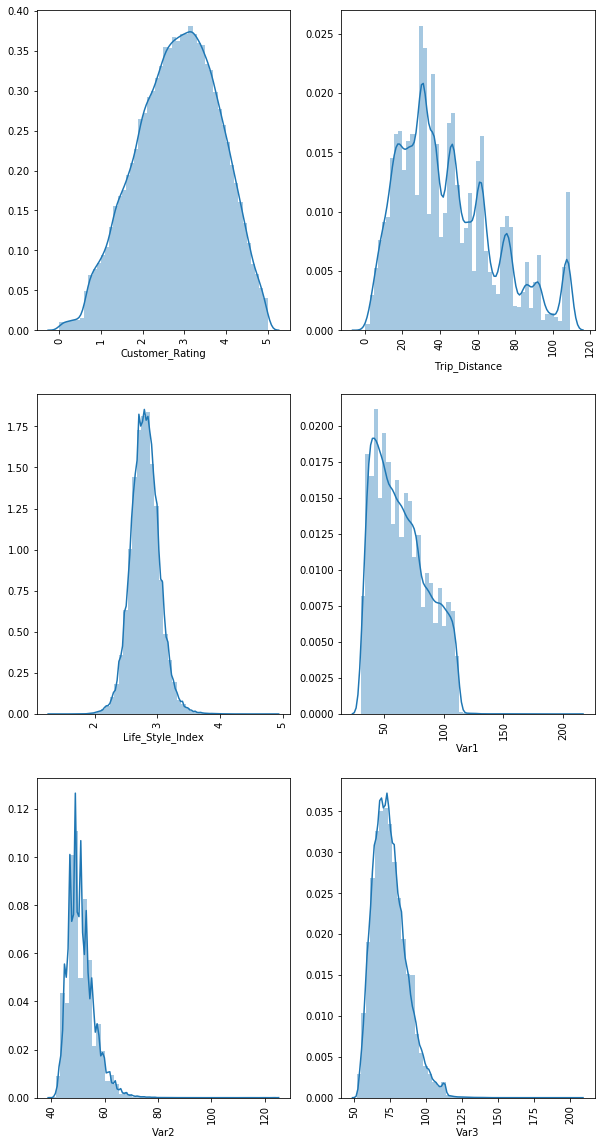

In [9]:
#VISUALISING NUMERICAL
fig, ax=plt.subplots(3,2,figsize=(10,20))
for variable,subplot in zip(numerical,ax.flatten()):
    sns.distplot(final[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

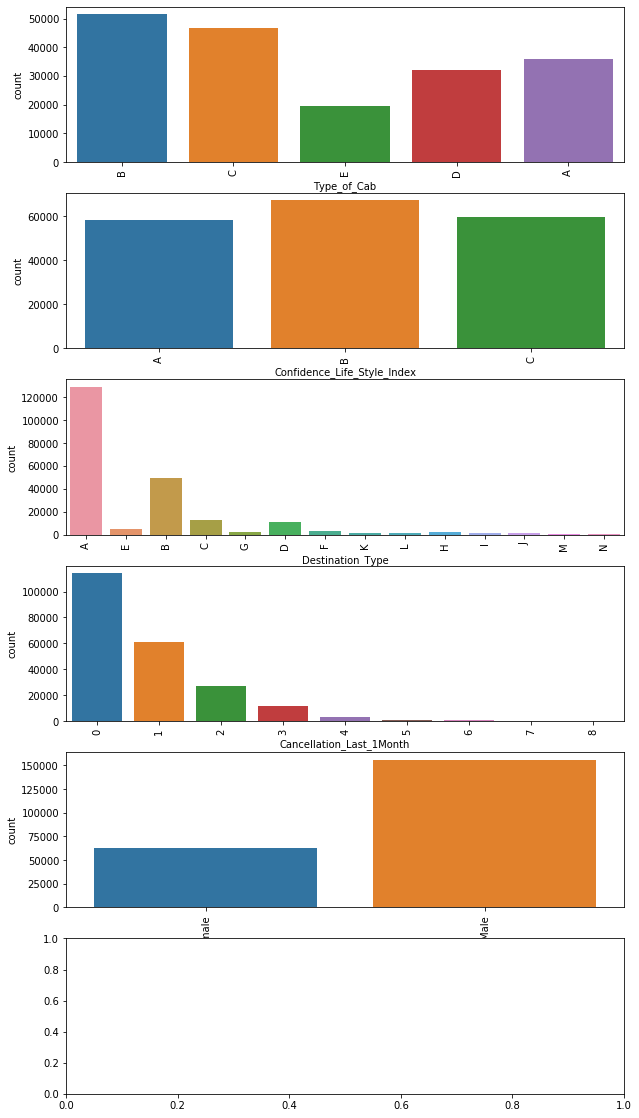

In [10]:
#CATEGORICAL
fig, ax=plt.subplots(6,figsize=(10,20))
for variable,subplot in zip(categorical_columns,ax.flatten()):
    sns.countplot(final[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

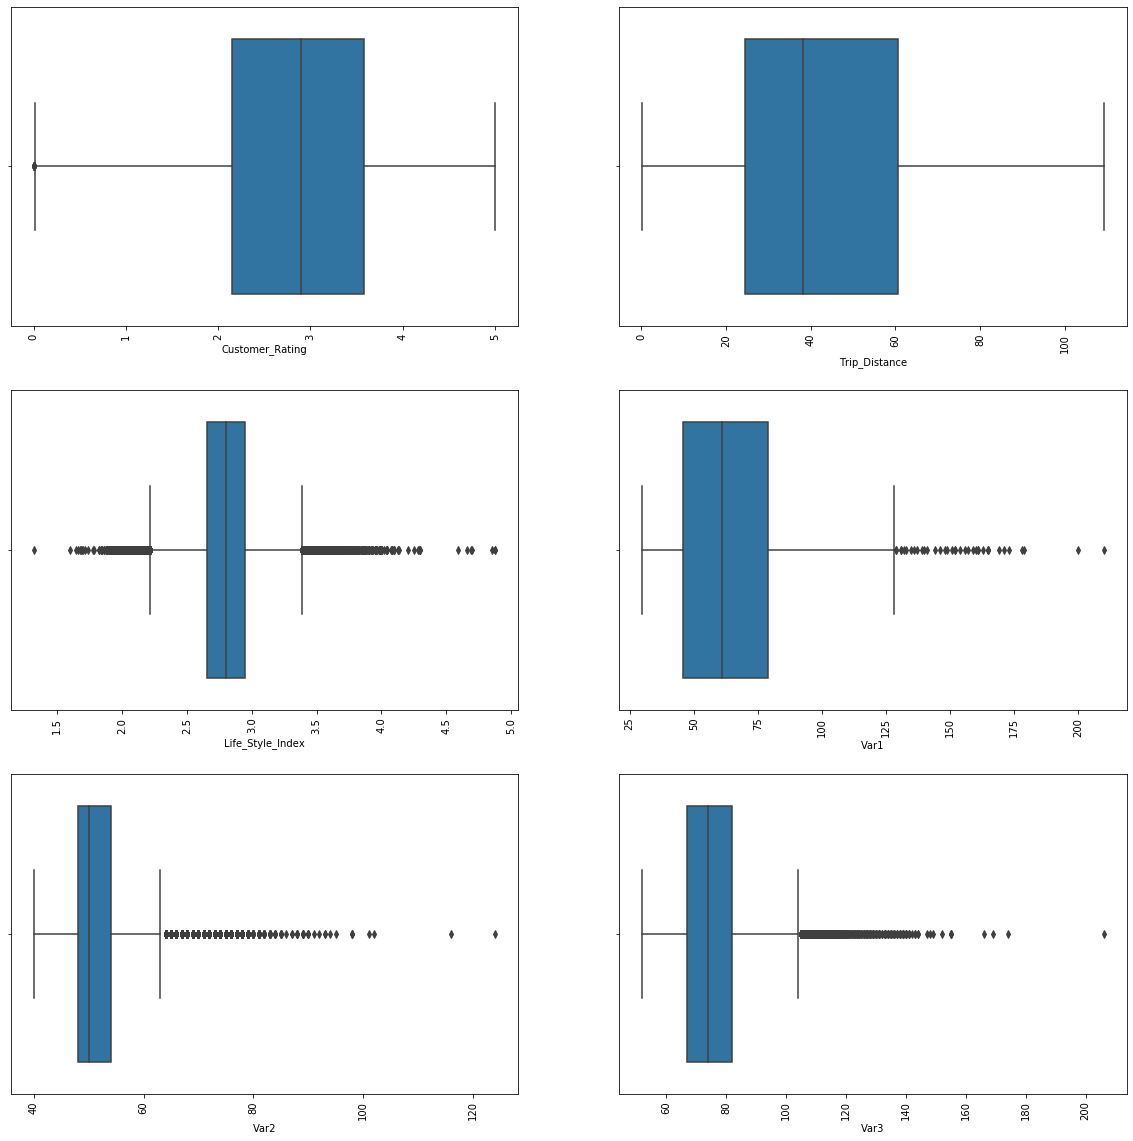

In [11]:
# VISUALISING BOXPLOT
fig, ax=plt.subplots(3,2,figsize=(20,20))
for variable,subplot in zip(numerical,ax.flatten()):
    sns.boxplot(final[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

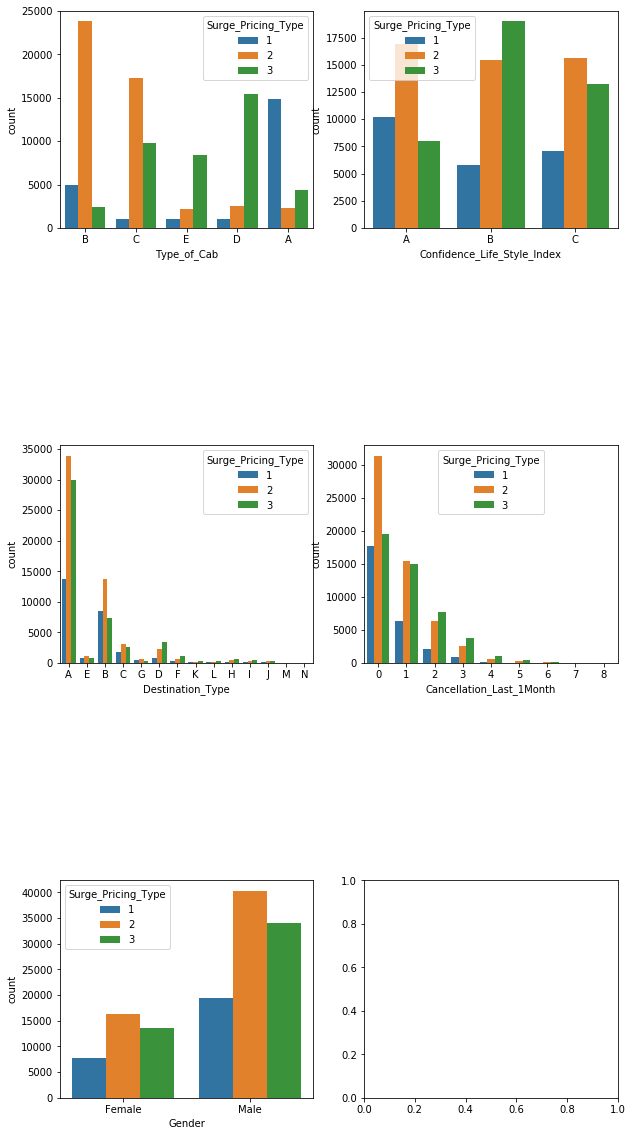

In [12]:
#### VISUALIZING CATEGORICAL WITH TARGET #####

fig,axes = plt.subplots(3,2,figsize=(10,20))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train,hue='Surge_Pricing_Type',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

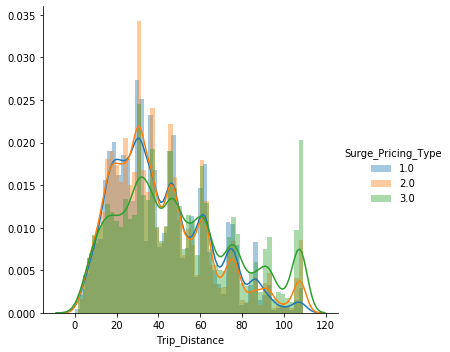

In [13]:
#SURGE 3 ARE SEEMS TO BE HIGH 
sns.FacetGrid(master,hue="Surge_Pricing_Type",size=5).map(sns.distplot,"Trip_Distance").add_legend()

In [14]:
#############DATA CLEANING#############

#1.TYPE OF CAB
master['Type_of_Cab'].value_counts(dropna=False)
Missing_cab = master[master.Type_of_Cab.isna()]
Missing_cab.head()

#FILL NA
master['Type_of_Cab']=master['Type_of_Cab'].fillna('B')

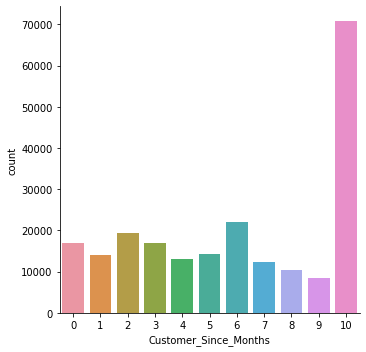

In [15]:
#2. CUSTOMER SINCE MONTHS
master['Customer_Since_Months'].value_counts(dropna=False)
Missing_c = master[master.Customer_Since_Months.isna()]
Missing_c.head()
master.Customer_Since_Months.fillna(master.Customer_Since_Months.median(),inplace=True)
master.Customer_Since_Months = master.Customer_Since_Months.astype(int)

sns.catplot(x="Customer_Since_Months",kind="count",data=master)

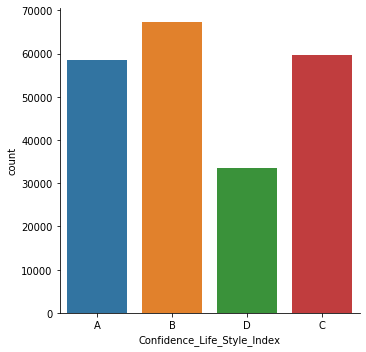

In [16]:
#LIFESTYLEINDEX
master.Life_Style_Index.fillna(master.Life_Style_Index.mean(),inplace=True)

#CONFIDENCE LIFESTYLE
master.Confidence_Life_Style_Index.value_counts(dropna=False)
master.Confidence_Life_Style_Index.fillna('D',inplace=True)
sns.catplot(x="Confidence_Life_Style_Index",kind="count",data=master)

In [17]:
###VAR1######
master.Var1.fillna(master.Var1.median(),inplace=True)

In [18]:
###################OUTLIER TREATMENT###############  # z
#LIFESTYLE
sorted(master['Life_Style_Index'])
quantile1,quantile3=np.percentile(master.Life_Style_Index,[25,75])

#IQR
iqr=quantile3-quantile1
print(iqr)
#UPPER AND LOWER BOUND
lb=quantile1 -(1.5 * iqr)
up=quantile3 +(1.5 * iqr)
print(lb,up)

0.22585999999999995
2.34926 3.2527


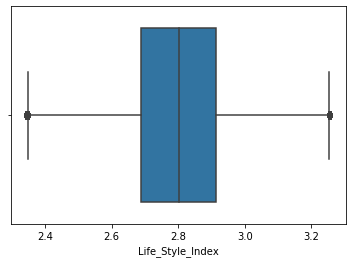

In [19]:
#TREATMENT
master.Life_Style_Index.loc[master.Life_Style_Index > 3.257]=3.2527
master.Life_Style_Index.loc[master.Life_Style_Index < 2.34296]=2.34296

sns.boxplot(master.Life_Style_Index)


In [20]:
# REMOVING COLOUMN#
master=master.drop(['Var1', 'Var2','Var3'], axis = 1)
master.head()

##########################ALL DATA ARE CLEANED AND TRANSFORMED NOW##############


,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1,2.427690,A,A,3.90500,0,Female,2.0
1,T0005689461,29.47,B,10,2.782450,B,A,3.45000,0,Male,2.0
2,T0005689464,41.58,B,10,2.802594,D,E,3.50125,2,Male,2.0
3,T0005689465,61.56,C,10,2.802594,D,A,3.45375,0,Male,3.0
4,T0005689467,54.95,C,10,3.034530,B,A,3.40250,4,Male,2.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219057 entries, 0 to 219056
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      219057 non-null  object 
 1   Trip_Distance                219057 non-null  float64
 2   Type_of_Cab                  219057 non-null  object 
 3   Customer_Since_Months        219057 non-null  int32  
 4   Life_Style_Index             219057 non-null  float64
 5   Confidence_Life_Style_Index  219057 non-null  object 
 6   Destination_Type             219057 non-null  object 
 7   Customer_Rating              219057 non-null  float64
 8   Cancellation_Last_1Month     219057 non-null  int64  
 9   Gender                       219057 non-null  object 
 10  Surge_Pricing_Type           131662 non-null  float64
dtypes: float64(4), int32(1), int64(1), object(5)
memory usage: 17.5+ MB


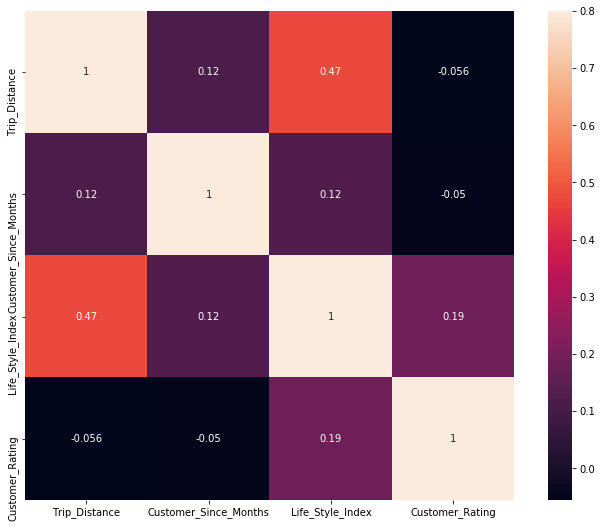

In [21]:
master.info()
contvars=master[['Trip_Distance','Customer_Since_Months','Life_Style_Index','Customer_Rating']]
#####CORRELATION MATRIX######
#correlation matrix
corrmat = contvars.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8,annot = True,square=True);


In [22]:

####FEATURE ENGINEERING#####
master['Trpper_Lif']=master['Trip_Distance'] / master['Life_Style_Index']

In [23]:
# CHECK TARGET VARIABLE###

master['Surge_Pricing_Type'].value_counts(normalize=True)*100

2.0    43.086084
3.0    36.244323
1.0    20.669593
Name: Surge_Pricing_Type, dtype: float64

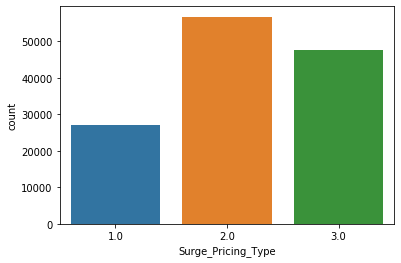

In [24]:
sns.countplot(master.Surge_Pricing_Type)

In [25]:
################BUILDING DUMMY##########
master= pd.get_dummies(master, columns=categorical_columns)
master.head()

,Trip_ID,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Surge_Pricing_Type,Trpper_Lif,Type_of_Cab_A,Type_of_Cab_B,Type_of_Cab_C,...,Cancellation_Last_1Month_1,Cancellation_Last_1Month_2,Cancellation_Last_1Month_3,Cancellation_Last_1Month_4,Cancellation_Last_1Month_5,Cancellation_Last_1Month_6,Cancellation_Last_1Month_7,Cancellation_Last_1Month_8,Gender_Female,Gender_Male
0,T0005689460,6.77,1,2.427690,3.90500,2.0,2.788659,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,T0005689461,29.47,10,2.782450,3.45000,2.0,10.591385,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,T0005689464,41.58,10,2.802594,3.50125,2.0,14.836255,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,T0005689465,61.56,10,2.802594,3.45375,3.0,21.965364,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,T0005689467,54.95,10,3.034530,3.40250,2.0,18.108241,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [26]:
##########3MODEL############3
###########MODEL BUILDING###########3
X = master[master['Surge_Pricing_Type'].isnull()!=True].drop(['Trip_ID','Surge_Pricing_Type'], axis=1)
y = master[master['Surge_Pricing_Type'].isnull()!=True]['Surge_Pricing_Type']

X_test = master[master['Surge_Pricing_Type'].isnull()==True].drop(['Trip_ID','Surge_Pricing_Type'], axis=1)

X.shape, y.shape, X_test.shape

########SPLITTING#####
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


In [27]:
###DECISION TREE####
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)  
Y_pred = decision_tree.predict(x_val)  
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree)
print(classification_report(y_val,Y_pred))

100.0
              precision    recall  f1-score   support

         1.0       0.50      0.49      0.49      5543
         2.0       0.58      0.58      0.58     11267
         3.0       0.57      0.57      0.57      9523

    accuracy                           0.56     26333
   macro avg       0.55      0.55      0.55     26333
weighted avg       0.56      0.56      0.56     26333



In [28]:
### RANDOM FOREST###
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_val)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
print(acc_random_forest)
print(classification_report(y_val,Y_prediction))

100.0
              precision    recall  f1-score   support

         1.0       0.71      0.53      0.61      5543
         2.0       0.64      0.77      0.70     11267
         3.0       0.70      0.63      0.66      9523

    accuracy                           0.67     26333
   macro avg       0.68      0.64      0.66     26333
weighted avg       0.67      0.67      0.66     26333



In [ ]:
####SVM###
from sklearn import svm
linear_svc = svm.SVC(decision_function_shape='ovo')
linear_svc.fit(x_train, y_train)

Y_pred = linear_svc.predict(x_val)

acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
print(acc_linear_svc)
print(classification_report(y_val,Y_pred))

In [78]:
########NAIVE BYES#########3
gaussian = GaussianNB() 
gaussian.fit(x_train,y_train)
y_pred=gaussian.predict(x_val)
acc_gaussian_nb=round(gaussian.score(x_train,y_train) * 100, 2)
print(acc_gaussian_nb)
print(classification_report(y_val,y_pred))

51.02
              precision    recall  f1-score   support

         1.0       0.35      0.85      0.50      5386
         2.0       0.61      0.35      0.45     11352
         3.0       0.74      0.51      0.60      9595

    accuracy                           0.51     26333
   macro avg       0.57      0.57      0.52     26333
weighted avg       0.60      0.51      0.51     26333



In [82]:
print(x_train.shape)#USE FOR CHOOSING K I.E SQRT(X_TRAIN)

(105329, 39)


In [84]:
##########KNN#########
knn=KNeighborsClassifier(n_neighbors=325)
knn.fit(x_train,y_train)
y_p=knn.predict(x_val)
acc_knn=round(knn.score(x_train,y_train) *100, 2)
print(acc_knn)
print(classification_report(y_val,y_p))

57.12
              precision    recall  f1-score   support

         1.0       0.84      0.21      0.33      5386
         2.0       0.52      0.85      0.64     11352
         3.0       0.64      0.43      0.52      9595

    accuracy                           0.56     26333
   macro avg       0.67      0.50      0.50     26333
weighted avg       0.63      0.56      0.53     26333



In [85]:
#KFOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Scores: [0.6636286  0.66619197 0.66609703 0.66030571 0.67131871 0.67055919
 0.66904016 0.67748979 0.66543245 0.66312191]
Mean: 0.6673185523774249
Standard Deviation: 0.0046866554604531865


In [86]:
#FOREST IMPT
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Customer_Rating,0.147
Trpper_Lif,0.147
Trip_Distance,0.144
Life_Style_Index,0.122
Type_of_Cab_A,0.080
Customer_Since_Months,0.071
Type_of_Cab_D,0.059
Type_of_Cab_B,0.057
Type_of_Cab_C,0.030


In [88]:
#############TUNNING PARAMETER################ WITH HIS OUT OF BAG SCORE
random_forest = RandomForestClassifier(n_estimators=1000, oob_score = True)
random_forest.fit(x_train, y_train)
Y_prediction = random_forest.predict(x_val)

random_forest.score(x_train, y_train)

acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")
print(classification_report(y_val,Y_prediction))

100.0 %
oob score: 67.02 %
              precision    recall  f1-score   support

         1.0       0.71      0.51      0.59      5386
         2.0       0.64      0.78      0.70     11352
         3.0       0.70      0.62      0.66      9595

    accuracy                           0.67     26333
   macro avg       0.68      0.64      0.65     26333
weighted avg       0.67      0.67      0.66     26333



In [91]:
#####FINDING BEST PARAMETER######
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=1)
clf.fit(x_train, y_train)
print(clf.best_estimator_)

KeyboardInterrupt: 

In [62]:
#CATBOOST CLASSIFIER#
from catboost import CatBoostClassifier,Pool, cv

y_pred_tot_cb = []
errs = []

from sklearn.model_selection import KFold,StratifiedKFold

fold = StratifiedKFold(n_splits=15)
i = 1
for train_index, test_index in fold.split(X,y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    m = CatBoostClassifier(n_estimators=5000,
                           random_state=1994,
                           learning_rate=0.03, max_depth=5)
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          verbose=200)
    pred = m.predict(x_val)
    print(i, " err_lgm: ", accuracy_score(y_val, pred))
    errs.append(accuracy_score(y_val, pred))
    pred_test = m.predict(X_test)
    i+=1
    y_pred_tot_cb.append(pred_test)
    
    

0:	learn: 1.0809359	test: 1.0809359	test1: 1.0814830	best: 1.0814830 (0)	total: 52.9ms	remaining: 4m 24s
200:	learn: 0.7462625	test: 0.7462625	test1: 0.7585983	best: 0.7585983 (200)	total: 11.4s	remaining: 4m 31s
400:	learn: 0.7366331	test: 0.7366331	test1: 0.7505958	best: 0.7505958 (400)	total: 22.4s	remaining: 4m 17s
600:	learn: 0.7319192	test: 0.7319192	test1: 0.7477018	best: 0.7477018 (600)	total: 33.5s	remaining: 4m 4s
800:	learn: 0.7287867	test: 0.7287867	test1: 0.7463007	best: 0.7463007 (800)	total: 44.5s	remaining: 3m 53s
1000:	learn: 0.7262491	test: 0.7262491	test1: 0.7453492	best: 0.7453452 (999)	total: 55.8s	remaining: 3m 43s
1200:	learn: 0.7240709	test: 0.7240709	test1: 0.7448510	best: 0.7448510 (1200)	total: 1m 6s	remaining: 3m 31s
1400:	learn: 0.7220261	test: 0.7220261	test1: 0.7444959	best: 0.7444836 (1392)	total: 1m 19s	remaining: 3m 23s
1600:	learn: 0.7202274	test: 0.7202274	test1: 0.7442692	best: 0.7442502 (1594)	total: 1m 30s	remaining: 3m 11s
1800:	learn: 0.7185446	

In [63]:
submission = pd.DataFrame()
submission['Trip_ID'] = master[master['Surge_Pricing_Type'].isnull()==True]['Trip_ID']
submission['Surge_Pricing_Type'] = y_pred_tot_cb[14]
submission.to_csv('normal.csv', index=False, header=True)

In [55]:
# These are the class weights for each class
class_1 =( len(y) - len(y[y==1]))/len(y)
class_2 =( len(y) - len(y[y==2]))/len(y)
class_3 =( len(y) - len(y[y==3]))/len(y)
print(class_1,class_2,class_3)

0.7933040664732421 0.5691391593626103 0.6375567741641476


In [57]:
#LIGHT GBM#

weight = {1: '0.79', 2: '0.56', 3: '0.63'}
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold

err = []
y_pred_tot_lgm = []

from sklearn.model_selection import StratifiedKFold

fold = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)
i = 1
for train_index, test_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    m = LGBMClassifier(boosting_type='gbdt',
                       max_depth=5,
                       learning_rate=0.05,
                       n_estimators=5000,
                       class_weight = weight,
                       min_child_weight = 0.02,
                       colsample_bytree=0.6, 
                       random_state=7,
                       objective='multiclass')
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          verbose=200)
    pred_y = m.predict(x_val)
    print(i, " err_lgm: ", accuracy_score(y_val, pred_y))
    err.append(accuracy_score(y_val, pred_y))
    pred_test = m.predict(X_test)
    i = i + 1
    y_pred_tot_lgm.append(pred_test)
  

Training until validation scores don't improve for 200 rounds
[200]	training's multi_logloss: 0.739236	valid_1's multi_logloss: 0.744852
[400]	training's multi_logloss: 0.726378	valid_1's multi_logloss: 0.741963
[600]	training's multi_logloss: 0.715825	valid_1's multi_logloss: 0.741683
Early stopping, best iteration is:
[523]	training's multi_logloss: 0.719714	valid_1's multi_logloss: 0.741549
1  err_lgm:  0.6892230576441103
Training until validation scores don't improve for 200 rounds
[200]	training's multi_logloss: 0.739501	valid_1's multi_logloss: 0.742184
[400]	training's multi_logloss: 0.726816	valid_1's multi_logloss: 0.739437
[600]	training's multi_logloss: 0.716642	valid_1's multi_logloss: 0.739439
Early stopping, best iteration is:
[493]	training's multi_logloss: 0.721953	valid_1's multi_logloss: 0.739313
2  err_lgm:  0.6891091364775576
Training until validation scores don't improve for 200 rounds
[200]	training's multi_logloss: 0.738935	valid_1's multi_logloss: 0.747112
[400]

In [60]:
submission = pd.DataFrame()
submission['Trip_ID'] = master[master['Surge_Pricing_Type'].isnull()==True]['Trip_ID']
submission['Surge_Pricing_Type'] = y_pred_tot_lgm[11]
submission.to_csv('normal_kfolds.csv', index=False, header=True)